### Setup

In [475]:
import numpy as np
import time

In [476]:
from qiskit import *
from qiskit.pulse import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

In [477]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

/Users/pranavgokhale/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-ornl', group='bes-qis', project='argonne')>]

In [478]:
provider = IBMQ.get_provider(group='bes-qis')
backend = provider.get_backend('ibmq_boeblingen')
system = pulse.PulseChannelSpec.from_backend(backend)

------
### Do nothing, just measure

In [66]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])

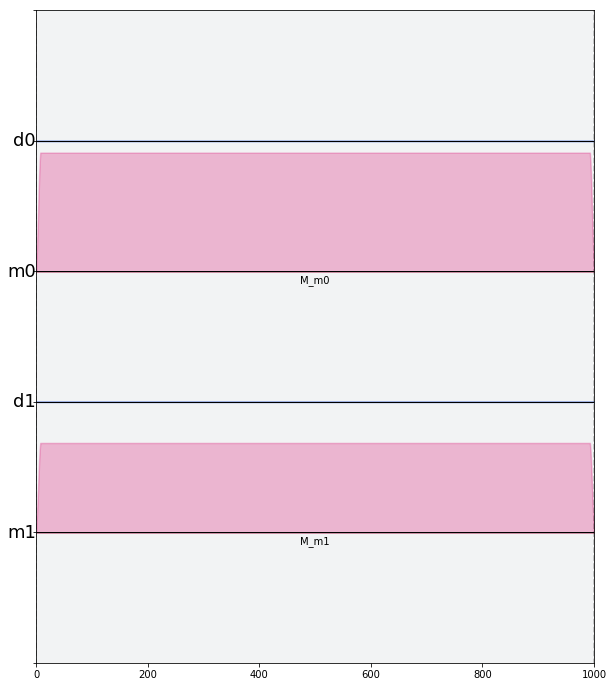

In [71]:
schedule = pulse.Schedule(name='Just measure immediately')
schedule |= measure << schedule.duration
schedule.draw(channels_to_plot=[system.qubits[0].measure, system.qubits[0].drive,
                                system.qubits[1].measure, system.qubits[1].drive],
              scaling=10.0, label=True, plot_range=(0, 1000))

In [74]:
job = execute(schedule, backend=backend)

In [138]:
print(job.job_id())

5d7563a69a6e4b0012f02e8e


In [140]:
job_id = '5d7563a69a6e4b0012f02e8e'
job = backend.retrieve_job(job_id)
print(job.result())

Result(backend_name='ibmq_boeblingen', backend_version='1.0.0', date=datetime.datetime(2019, 9, 8, 20, 40, 28, tzinfo=tzutc()), execution_id='d01814a4-d278-11e9-a4c3-ac1f6bb56700', header=Obj(backend_name='ibmq_boeblingen', backend_version='1.0.0'), job_id='', qobj_id='01b62b4b-60cc-46d9-88e6-c2a370cbdbd6', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=539, 0x1=66, 0x10=39, 0x100=33, 0x1000=12, 0x10000=8, 0x10008=1, 0x10010=1, 0x10020=1, 0x101=8, 0x1010=2, 0x10101=1, 0x10200=1, 0x102c8=1, 0x108=1, 0x10800=1, 0x11=3, 0x110=2, 0x1100=1, 0x111=1, 0x12=1, 0x120=1, 0x12000=1, 0x14000=2, 0x18=2, 0x180=1, 0x1800=2, 0x18100=1, 0x184=1, 0x1880=1, 0x190=1, 0x2=3, 0x20=12, 0x200=15, 0x2000=29, 0x20000=1, 0x2001=3, 0x20010=1, 0x2002=1, 0x201=3, 0x2010=8, 0x20100=1, 0x20200=1, 0x2040=2, 0x2041=1, 0x208=1, 0x210=1, 0x2100=4, 0x2200=1, 0x22010=1, 0x2300=1, 0x2310=1, 0x240=1, 0x2400=2, 0x280=1, 0x2800=1, 0x2850=1, 0x2a000=1, 0x3000=2, 0x4=3, 0x40=15, 0x400=6, 0x4000=10, 0x40000=6,

In [141]:
for hex_output, count in job.result().results[0].data.counts.to_dict().items():
    print(bin(int(hex_output, 16))[2:].zfill(20), count)

00010000000000100000 1
10000000000010000000 2
10000000000001000001 1
10010000000000010000 1
00000010010000000000 2
00000000100000000001 3
00000100000000010000 2
00000100000000010001 1
00010000000000001000 1
00000000000100000000 33
00000100000000000000 10
00101010000000000000 1
10000000000000100000 2
00001001000000010001 1
00011000000100000000 1
00000000000100010000 2
00000110000001000000 1
00000000001000001000 1
10000000000000010000 3
00100000001000000000 1
00000010001000000000 1
00000000001000010000 1
00000000001001000000 1
10000100000000000000 1
00001100011000000000 1
00000000000010001000 1
00000000000001000100 1
00000000001000000000 15
10000010000000000000 1
00000000000000100000 12
10000000000010010000 1
10000000000000000100 1
00001000000000000000 16
00000100000000000001 1
00010000001011001000 1
00000000100000000000 15
00000000000000001001 2
00000010000001000001 1
00100010000000010000 1
00000010100000000000 1
00000100100000000000 1
00000010000000010000 8
00000110000100000000 1
00000

'10000000000000000001'

------
### Apply X on first qubit, then measure

In [158]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
x_on_first_qubit = cmd_def.get('x', qubits=[0])
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])

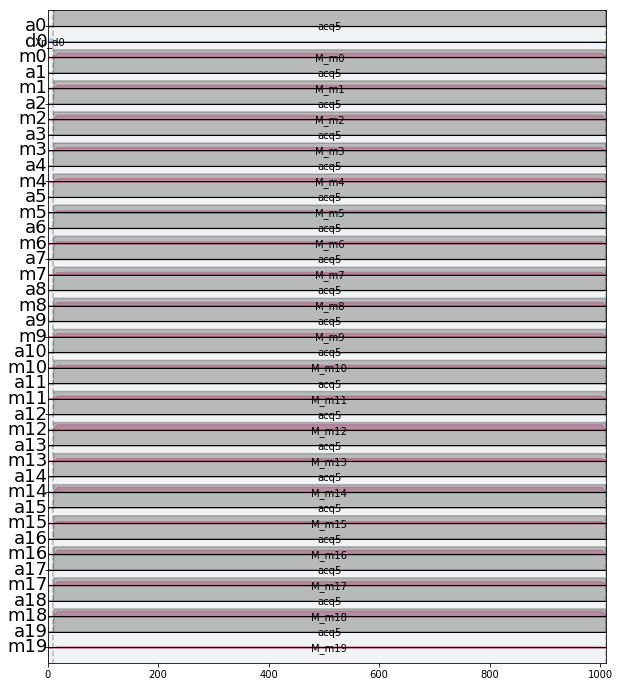

In [163]:
schedule = pulse.Schedule(name='Apply X on first qubit, then measure')
schedule |= x_on_first_qubit << schedule.duration
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [164]:
job = execute(schedule, backend=backend)

In [165]:
print(job.job_id())

5d756ced81883e00110497da


In [172]:
job_id = '5d756ced81883e00110497da'
job = backend.retrieve_job(job_id)
job_monitor(job)
print(job.result())

Job Status: job has successfully run
Result(backend_name='ibmq_boeblingen', backend_version='1.0.0', date=datetime.datetime(2019, 9, 8, 21, 8, 13, tzinfo=tzutc()), execution_id='b1a76a02-d27c-11e9-a26e-ac1f6bb56700', header=Obj(backend_name='ibmq_boeblingen', backend_version='1.0.0'), job_id='', qobj_id='dfd8a593-ca83-491f-8f73-93e3585bc248', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=55, 0x1=360, 0x10=3, 0x100=5, 0x10000=3, 0x10001=14, 0x10005=1, 0x1001=7, 0x10011=4, 0x10021=2, 0x10081=2, 0x101=15, 0x10101=2, 0x10111=1, 0x1031=1, 0x10801=1, 0x1081=7, 0x1091=2, 0x10a1=5, 0x10c0=1, 0x10c1=1, 0x11=47, 0x110=1, 0x1101=1, 0x110a1=1, 0x111=5, 0x119=1, 0x121=6, 0x12220=1, 0x12c1=1, 0x13=1, 0x131=1, 0x14=1, 0x14001=2, 0x14010=1, 0x14501=1, 0x15=1, 0x1801=1, 0x181=1, 0x1821=1, 0x19=1, 0x1a1=1, 0x1c1=2, 0x2=1, 0x20=6, 0x2000=3, 0x20000=1, 0x20001=1, 0x2001=11, 0x20011=1, 0x20021=1, 0x20031=1, 0x20051=1, 0x201=19, 0x2010=1, 0x2011=1, 0x2021=2, 0x2025=1, 0x2080=1, 0x2081=1

In [173]:
for hex_output, count in job.result().results[0].data.counts.to_dict().items():
    print(bin(int(hex_output, 16))[2:].zfill(20), count)

00000001000100000001 1
01000000000000010001 1
10000000000010000000 1
10000000000000001000 1
00000100000000010000 2
00000100000000010001 7
00000100000010010001 1
00000110000000000001 2
00000000000100000000 5
00000000001000011001 1
00000001000010000001 7
00000101000010010001 1
10000000000000010000 1
00010000000000100001 2
00010000000000000101 1
00000100001000011001 1
00000100000000000001 40
00000100000010000001 3
00000000100000000000 1
00000001000000110001 1
00000000000000001001 2
10001000000000000001 1
00010000000010000001 2
10000000000100100000 1
10000001000000000000 1
00000100000000100001 4
00001000000010000001 1
00001000100000000001 2
00100000000000000001 1
10000000000000000010 1
00000000010000010001 3
00010000000100000001 2
00000110010000100001 1
00000001000010010001 2
00000000001000000001 19
00000000000000010100 1
00010100000000000001 2
00000010000000000001 11
10000010000000000001 1
00000000000010000000 3
00001000000000010001 2
00000011000001000000 1
00000000000100000001 15
1000000

------
### Apply X on first qubit, then CNOT on first two, then measure

In [179]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
x_on_first_qubit = cmd_def.get('x', qubits=[0])
cnot_on_first_two = cmd_def.get('cx', qubits=[1,0])
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])

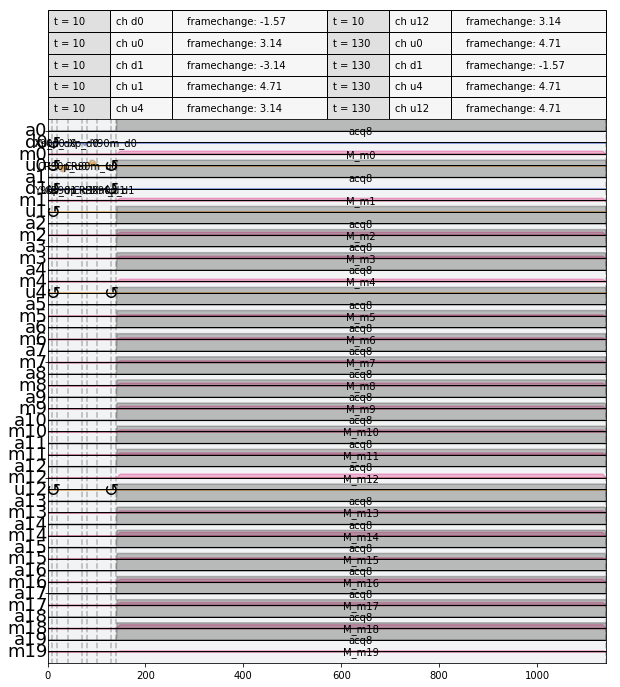

In [180]:
schedule = pulse.Schedule(name='Apply X on first qubit, then CNOT on first two, then measure')
schedule |= x_on_first_qubit << schedule.duration
schedule |= cnot_on_first_two << schedule.duration
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [181]:
job = execute(schedule, backend=backend)

In [182]:
print(job.job_id())

5d756e80c055870011275d44


In [467]:
cnot_on_first_two.instructions[7][1].command.samples

array([-0.01332429-0.02471008j, -0.03190967-0.05917691j,
       -0.05577351-0.10343271j, -0.08376795-0.15534878j,
       -0.11339387-0.21029043j, -0.14101495-0.26151407j,
       -0.16252565-0.30140597j, -0.17586072-0.32613602j,
       -0.17586072-0.32613602j, -0.17586072-0.32613602j,
       -0.17586072-0.32613602j, -0.17586072-0.32613602j,
       -0.17586072-0.32613602j, -0.17586072-0.32613602j,
       -0.16252565-0.30140597j, -0.14101495-0.26151407j,
       -0.11339387-0.21029043j, -0.08376795-0.15534878j,
       -0.05577351-0.10343271j, -0.03190967-0.05917691j,
       -0.01332429-0.02471008j])

In [285]:
for start_time, instruction in cnot_on_first_two.instructions:
    print(instruction, instruction.channels)

FrameChange(fc2431, phase=-1.571) (DriveChannel(0),)
FrameChange(fc2434, phase=3.142) (ControlChannel(0),)
FrameChange(fc2432, phase=4.712) (ControlChannel(1),)
FrameChange(fc2433, phase=-3.142) (DriveChannel(1),)
FrameChange(fc2435, phase=3.142) (ControlChannel(4),)
FrameChange(fc2436, phase=3.142) (ControlChannel(12),)
SamplePulse(X90p_d0, duration=10) (DriveChannel(0),)
SamplePulse(Y90p_d1, duration=10) (DriveChannel(1),)
SamplePulse(CR90p_u0, duration=21) (ControlChannel(0),)
SamplePulse(CR90p_d1, duration=50) (DriveChannel(1),)
SamplePulse(Xp_d0, duration=10) (DriveChannel(0),)
SamplePulse(CR90m_u0, duration=21) (ControlChannel(0),)
SamplePulse(CR90m_d1, duration=50) (DriveChannel(1),)
FrameChange(fc2438, phase=4.712) (ControlChannel(0),)
FrameChange(fc2437, phase=-1.571) (DriveChannel(1),)
FrameChange(fc2439, phase=4.712) (ControlChannel(4),)
FrameChange(fc2440, phase=4.712) (ControlChannel(12),)
SamplePulse(Y90m_d0, duration=10) (DriveChannel(0),)
SamplePulse(X90p_d1, duration=1

In [287]:
job_id = '5d756e80c055870011275d44'
job = backend.retrieve_job(job_id)
job_monitor(job)
print(job.result())

Job Status: job has successfully run
Result(backend_name='ibmq_boeblingen', backend_version='1.0.0', date=datetime.datetime(2019, 9, 8, 23, 28, 49, tzinfo=tzutc()), execution_id='54d00db6-d290-11e9-bb29-ac1f6bb56700', header=Obj(backend_name='ibmq_boeblingen', backend_version='1.0.0'), job_id='', qobj_id='f71d64d8-7720-4342-a21f-41b4e0f8898c', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=97, 0x1=46, 0x10=8, 0x100=10, 0x1000=1, 0x10000=1, 0x10001=1, 0x10002=5, 0x10003=1, 0x10005=1, 0x1001=1, 0x1002=6, 0x1003=1, 0x10081=1, 0x10082=3, 0x101=6, 0x10140=1, 0x102=14, 0x10202=1, 0x103=1, 0x10302=1, 0x108=1, 0x1082=1, 0x1083=1, 0x11=2, 0x11083=1, 0x112=3, 0x1181=1, 0x12=18, 0x12800=1, 0x13=3, 0x1402=1, 0x1802=1, 0x182=3, 0x2=279, 0x20=2, 0x200=4, 0x2000=1, 0x20000=1, 0x20002=4, 0x20003=1, 0x20006=1, 0x2002=5, 0x200a=1, 0x201=6, 0x20106=1, 0x202=10, 0x203=1, 0x2081=2, 0x2082=3, 0x20c2=1, 0x21=1, 0x22=11, 0x22010=1, 0x24=1, 0x243=1, 0x280=1, 0x282=6, 0x283=1, 0x286=1, 0x2a=

In [288]:
for hex_output, count in job.result().results[0].data.counts.to_dict().items():
    print(bin(int(hex_output, 16))[2:].zfill(20), count)

10000000000010000000 3
01000010000000000011 1
00000000000000110010 2
00000100000000010001 3
00000100000010010001 1
00000001000000000010 6
00000000000100000000 10
00010000000010000010 3
00000000101100000010 1
10000000000000010000 1
00000000000000000110 1
00001000000001000010 1
00110000000000000001 1
00000000100010000000 2
00000000000000001010 2
00010000000000000011 1
00000000010000100010 1
00000000001000000000 4
00010000000000000101 1
00000000010001000001 1
00000000101000110010 1
00000100000010000010 3
00001000000000000000 5
00000000000100000010 14
00000100000000000001 2
00000000010000000011 1
00000100000010000001 2
00000000100000000000 8
00000000100000000010 9
00000000000000001001 1
00000000001010000110 1
00001000000000010010 2
00010000000101000000 1
00010000000010000001 1
00000001000010000010 1
00000110000010000010 1
00001000000000010000 1
00000010000000000010 5
10001000100000000000 1
00010000001100000010 1
00000000000000101010 1
00000100000110000001 1
00001000010010000000 1
000000000

------
### Apply X on first qubit, then CNOT on first two, then measure

In [289]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
x_on_first_qubit = cmd_def.get('x', qubits=[0])
cnot_on_first_two = cmd_def.get('cx', qubits=[0,1])
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])

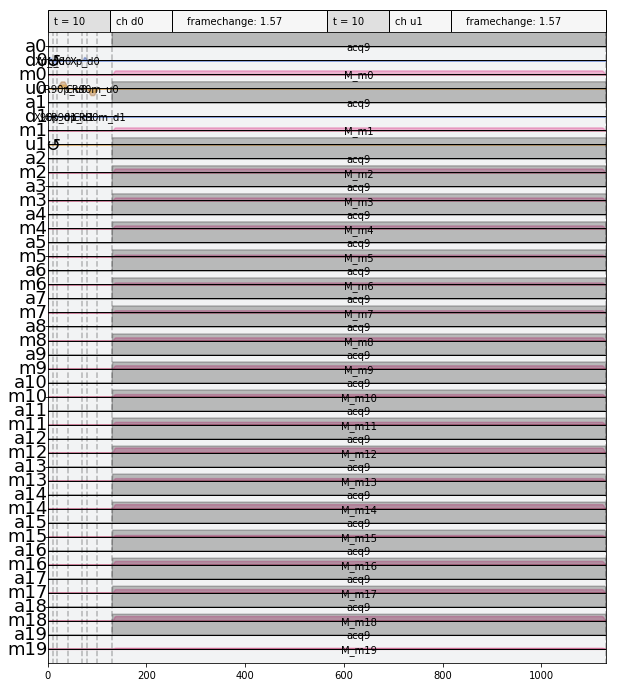

In [290]:
schedule = pulse.Schedule(name='Apply X on first qubit, then measure')
schedule |= x_on_first_qubit << schedule.duration
schedule |= cnot_on_first_two << schedule.duration
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [291]:
job = execute(schedule, backend=backend)

In [292]:
print(job.job_id())

5d759080a4f43800125752fe


In [293]:
job_id = '5d759080a4f43800125752fe'
job = backend.retrieve_job(job_id)
job_monitor(job)
print(job.result())

Job Status: job has successfully run
Result(backend_name='ibmq_boeblingen', backend_version='1.0.0', date=datetime.datetime(2019, 9, 9, 0, 13, 23, tzinfo=tzutc()), execution_id='8ebc8774-d296-11e9-9aa6-ac1f6bb56700', header=Obj(backend_name='ibmq_boeblingen', backend_version='1.0.0'), job_id='', qobj_id='e29b1d29-27f0-4777-9618-7c2c348df2c6', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=72, 0x1=360, 0x10=5, 0x100=8, 0x1000=4, 0x10000=2, 0x10001=7, 0x10002=2, 0x10005=2, 0x1001=9, 0x10011=2, 0x10015=1, 0x1002=1, 0x101=23, 0x10101=1, 0x102=2, 0x1021=1, 0x103=5, 0x105=1, 0x10801=1, 0x11=35, 0x110=1, 0x1101=1, 0x111=3, 0x12=5, 0x13=5, 0x14000=1, 0x141=1, 0x15=5, 0x16001=1, 0x1801=1, 0x181=1, 0x183=1, 0x19=1, 0x1a04=1, 0x2=55, 0x200=1, 0x2000=3, 0x20000=1, 0x2001=15, 0x2002=2, 0x2003=1, 0x2004=2, 0x2005=2, 0x201=12, 0x2010=1, 0x20106=1, 0x2011=3, 0x2012=1, 0x202=3, 0x203=1, 0x205=2, 0x21=3, 0x210=1, 0x2101=2, 0x211=3, 0x2110=1, 0x213=1, 0x22=1, 0x2201=1, 0x2401=1, 0x242

In [294]:
for hex_output, count in job.result().results[0].data.counts.to_dict().items():
    print(bin(int(hex_output, 16))[2:].zfill(20), count)

00000001000100000001 1
00000000010100000000 1
00000000110000000011 1
00000110000000000001 1
00000001000000000010 1
00000000000100000000 8
00001000000010000101 1
00000010010000000001 1
00000000000000000110 3
00000000001000010000 1
00000000000001000100 1
00000000001000000000 1
00010000000000000101 2
00000000000010010011 1
00001010000000010000 1
00001000000000000000 2
00000000000100000010 2
00000100000000000001 10
00000000100000000000 3
00000000100000000010 6
00000000000000001001 1
00000100000000100001 1
00000010000000000010 2
00000000100000000101 2
00000000000010001011 1
10010100000000000001 1
00001000000000000101 1
00000000001000010011 1
10000000000000000010 6
00100000000100000110 1
00010000000100000001 1
00000000001000000011 1
00000000000010010000 1
10000000000000101001 1
00001000010000000001 1
00001000100000000010 1
00000000001000000001 12
10000000000100000001 1
11000000000000000011 1
00000010000000000001 15
00010110000000000001 1
00000000000010000000 2
00001000000000010001 3
00001010

------
### Apply X on all qubits, then measure

In [516]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)

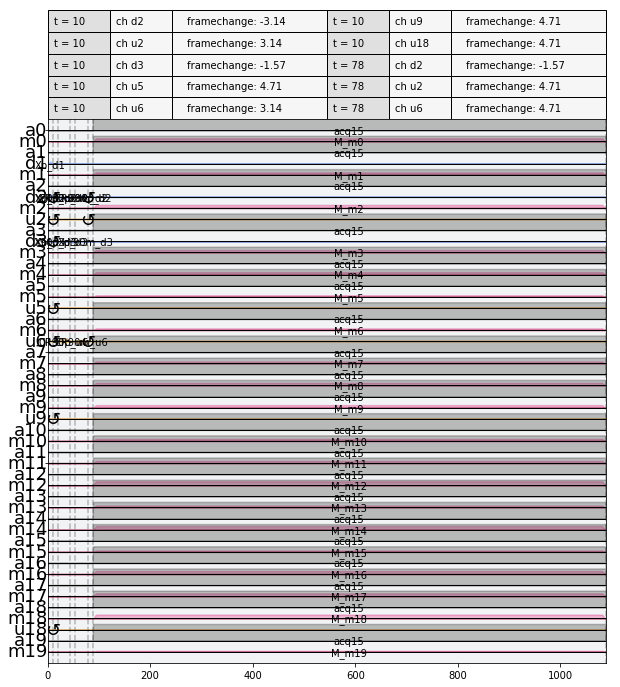

In [536]:
schedule = pulse.Schedule(name='Apply X on all qubit, then measure')
for i in [1, 2, 3]:
    schedule |= cmd_def.get('x', qubits=[i])
schedule |= cmd_def.get('cx', qubits=[2, 3]) << schedule.duration
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [537]:
job = execute(schedule, backend=backend)

In [538]:
print(job.job_id())

5d7bff13d2248d0018abba9a


In [539]:
job_id = '5d7bff13d2248d0018abba9a'
job = backend.retrieve_job(job_id)
job_monitor(job)

Job Status: job has successfully run


In [541]:
counts

{'110': 249, '1010': 126, '10': 47, '111': 36}

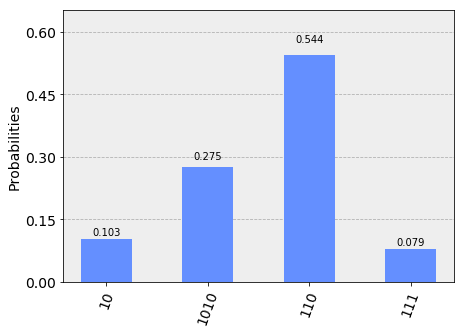

In [540]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 30}
plot_histogram(counts)

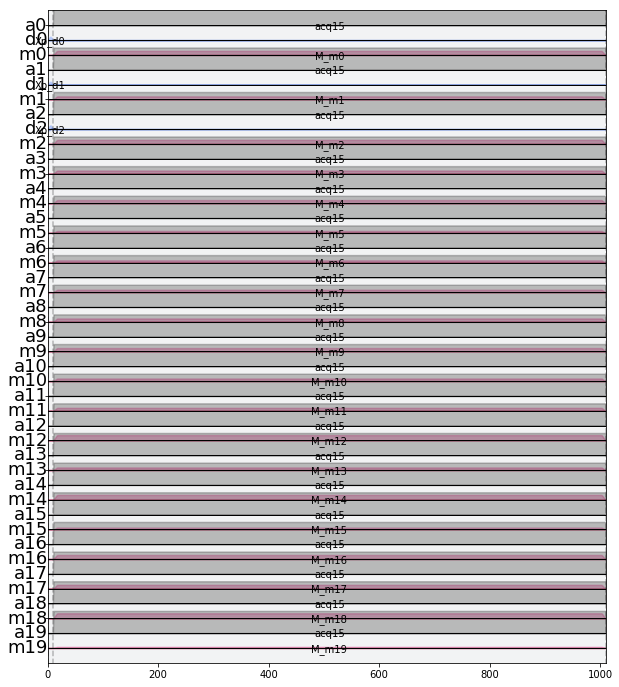

In [542]:
schedule = pulse.Schedule(name='Apply X on all qubit, then measure')
for i in [0, 1, 2]:
    schedule |= cmd_def.get('x', qubits=[i])
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [543]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d7c01ead05f3100188195e6


In [545]:
job_id = '5d7c01ead05f3100188195e6'
job = backend.retrieve_job(job_id)
job_monitor(job)

Job Status: job has successfully run


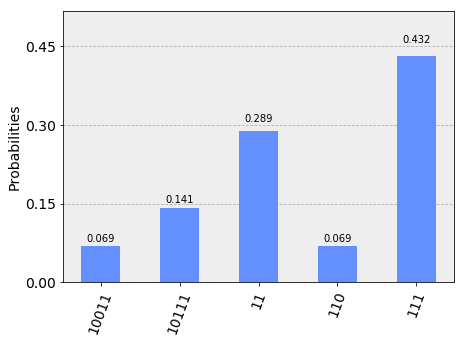

In [546]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 30}
plot_histogram(counts)

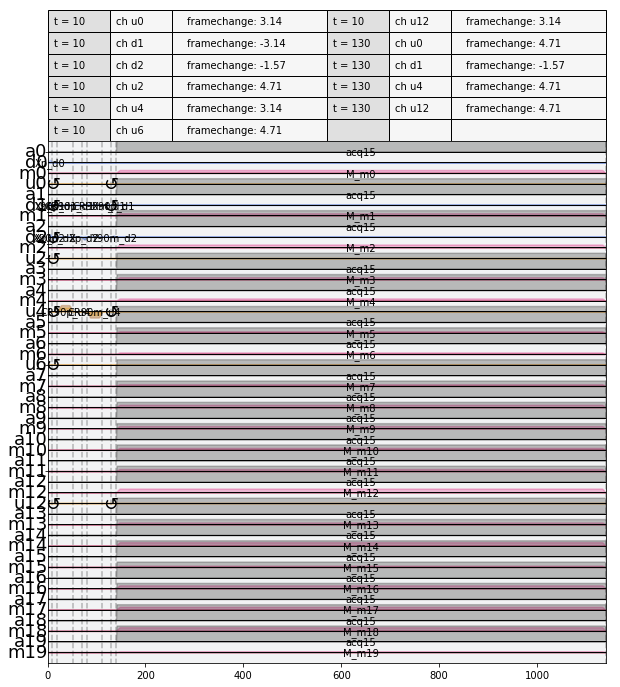

In [547]:
schedule = pulse.Schedule(name='Apply X on all qubit, then measure')
for i in [0, 1, 2]:
    schedule |= cmd_def.get('x', qubits=[i])
schedule |= cmd_def.get('cx', qubits=[1, 2]) << schedule.duration
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [591]:
job = execute(schedule, backend=backend)
print(job.job_id())

5d7c11bc553773001800133a


In [590]:
cmd_def.get('id', 7).instructions[0][1]
#cmd_def.get(inst.name, inst_qubits, *inst.params)

AttributeError: 'PulseInstruction' object has no attribute 'samples'

In [593]:
job = backend.retrieve_job(job.job_id())
job_monitor(job)

Job Status: job has successfully run


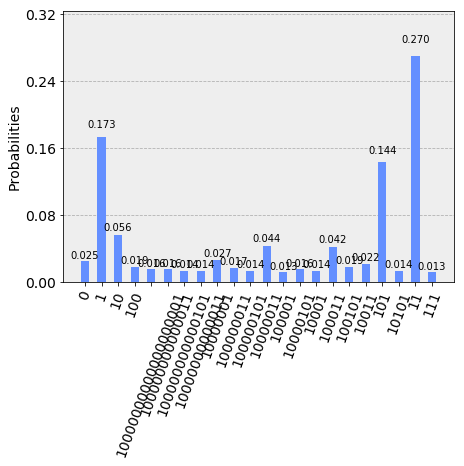

In [597]:
counts = job.result().get_counts()
counts = {key: value for key, value in counts.items() if value > 7}
plot_histogram(counts)

------
### Apply X on all qubit, then CNOT, then measure

In [469]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
x_on_first_qubit = cmd_def.get('x', qubits=[0])
x_on_second_qubit = cmd_def.get('x', qubits=[1])
cnot_on_first_two = cmd_def.get('cx', qubits=[0,1])
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])

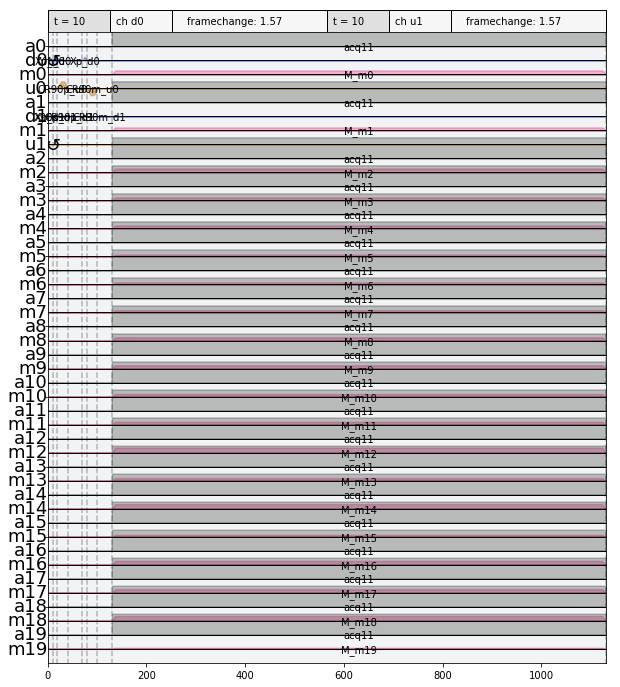

In [470]:
schedule = pulse.Schedule(name='Apply X on all qubit, then CNOT, then measure')
for i in range(20):
    schedule |= cmd_def.get('x', qubits=[i])
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [471]:
job = execute(schedule, backend=backend)

In [472]:
print(job.job_id())

5d7700aeed2b020019b10ac9


In [473]:
job_id = '5d7700aeed2b020019b10ac9'
job = backend.retrieve_job(job_id)
job_monitor(job)
print(job.result())

Job Status: job has successfully run
Result(backend_name='ibmq_boeblingen', backend_version='1.0.0', date=datetime.datetime(2019, 9, 10, 2, 1, 26, tzinfo=tzutc()), execution_id='d1a10d48-d36e-11e9-aa9f-ac1f6bb56700', header=Obj(backend_name='ibmq_boeblingen', backend_version='1.0.0'), job_id='', qobj_id='2714f180-6221-47c7-ae54-22999e94e2b0', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=85, 0x1=128, 0x10=8, 0x100=5, 0x10000=3, 0x10001=2, 0x10003=7, 0x10005=1, 0x10006=1, 0x1001=2, 0x1002=1, 0x1003=3, 0x10037=1, 0x1005=1, 0x10083=1, 0x101=11, 0x1010=1, 0x1017=2, 0x102=2, 0x103=13, 0x104=1, 0x105=1, 0x106=1, 0x107=3, 0x1080=1, 0x10805=1, 0x1087=1, 0x11=18, 0x1100=1, 0x1103=2, 0x111=1, 0x113=2, 0x12=5, 0x1203=1, 0x123=1, 0x13=20, 0x14=4, 0x1480=1, 0x15=3, 0x17=6, 0x1803=1, 0x1881=1, 0x1883=1, 0x1b=1, 0x1c012=1, 0x2=27, 0x20=2, 0x200=4, 0x2000=2, 0x20001=2, 0x20005=1, 0x2001=4, 0x2002=2, 0x2003=8, 0x2009=1, 0x201=6, 0x20103=2, 0x2013=1, 0x202=2, 0x2023=1, 0x203=10, 0x2

In [474]:
for hex_output, count in job.result().results[0].data.counts.to_dict().items():
    print(bin(int(hex_output, 16))[2:].zfill(20), count)

10000000000010000000 1
00000000000100010011 2
10000100000100000001 1
10000000100000000011 1
00000100000100000011 3
00000100000010000011 2
00000100000000010000 1
00000100000000010001 2
00000000001000010111 1
00000001000000000010 1
00000000000100000000 5
00001000000100000101 1
01000000000000000111 1
00000100000110000011 1
00000000010000010101 1
10000000000000100000 1
00000000000000000110 2
00000000000001010000 1
00000010000000001001 1
00000000000100000110 1
00000000000100100011 1
00000000100010000000 2
00010000000000000011 7
00000000001000000000 4
00010000000000000101 1
00000000000010010011 1
10000000000000000101 2
00001000000000000000 2
00000000000100000010 2
00000100000000000001 7
00000000000000011011 1
00000000010000000011 2
00000000100000000000 1
00000000100000000010 3
00000000000000001001 1
10001000000000000001 1
00000000000000100111 1
10010000000000000111 1
10000000000001000011 1
11000000000011010000 1
00000100000000100001 1
00000010000000000010 2
01000000001010000011 1
00000110000

------
### Do nothing, just measure

In [510]:
provider = IBMQ.get_provider(group='bes-qis')
backend = provider.get_backend('ibmq_boeblingen')

In [511]:
cmd_def = pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)

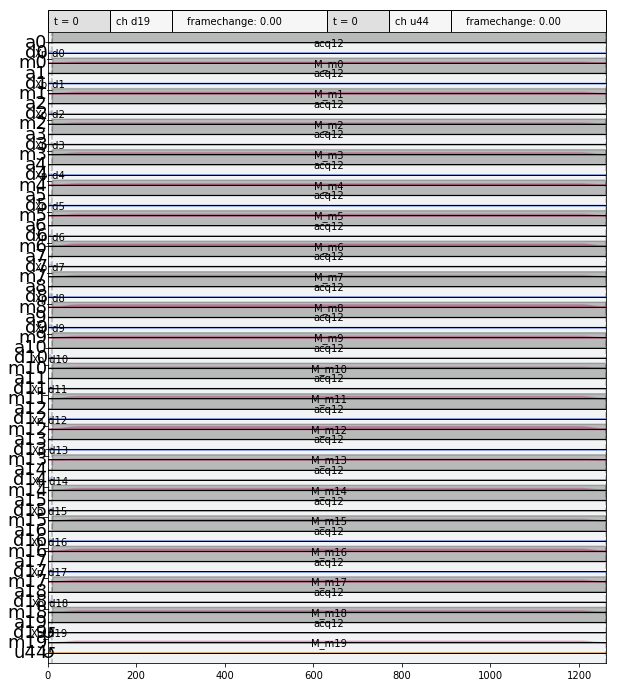

In [512]:
schedule = pulse.Schedule(name='Apply X on all qubit, then CNOT, then measure')
for i in range(20):
    schedule |= cmd_def.get('x', qubits=[i])
schedule |= measure << schedule.duration
schedule.draw(scaling=3.0, label=True)

In [507]:
job = execute(schedule, backend=backend)

In [514]:
print(job.job_id())

5d7be42894418f00185d0259


In [515]:
job_id = '5d7be42894418f00185d0259'
job = backend.retrieve_job(job_id)
job_monitor(job)
print(job.result())

/Users/pranavgokhale/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqbackend.py:285: UserWarning: Job "5d7be42894418f00185d0259" belongs to another backend than the one queried. The query was made on backend "ibmq_boeblingen", but the job actually belongs to backend "ibmq_20_tokyo".
  .format(job_id, self.name(), job_backend_name))


IBMQBackendError: 'Failed to get job "5d7be42894418f00185d0259": job does not belong to backend "ibmq_boeblingen".'